In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('datasets/saidas/producao/producao.csv',sep=';')
display(df)

,Unnamed: 0,produto,ano,quantidade
0,0,Espumantes,2008,1202152.0
1,1,Suco de Uva,2008,35647994.0
2,2,Vinho de Mesa,2008,334841312.0
3,3,Espumantes,2009,1190500.0
4,4,Suco de Uva,2009,39715098.0
5,5,Vinho de Mesa,2009,245318774.0
6,6,Espumantes,2010,713518.0
7,7,Suco de Uva,2010,50125944.0
8,8,Vinho de Mesa,2010,220073693.0
9,9,Espumantes,2011,245461.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45 non-null     int64  
 1   produto     45 non-null     object 
 2   ano         45 non-null     int64  
 3   quantidade  45 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ KB


In [5]:
# pd.options.display.float_format = "{:.2f}".format

In [6]:
df_usaveis = df.set_index('produto')
df_usaveis.head()

,Unnamed: 0,ano,quantidade
produto,,,
Espumantes,0,2008,1202152.0
Suco de Uva,1,2008,35647994.0
Vinho de Mesa,2,2008,334841312.0
Espumantes,3,2009,1190500.0
Suco de Uva,4,2009,39715098.0


In [7]:
df_usaveis = df.set_index('produto')
df_usaveis.head()

,Unnamed: 0,ano,quantidade
produto,,,
Espumantes,0,2008,1202152.0
Suco de Uva,1,2008,35647994.0
Vinho de Mesa,2,2008,334841312.0
Espumantes,3,2009,1190500.0
Suco de Uva,4,2009,39715098.0


In [10]:
df['producao'] = df['quantidade'] / 1_000_000

# fig = df_usaveis.plot(x='ano',y='producao', figsize=(20,6), kind='line',title='Crescimento de Produção')

In [ ]:
anos = df['ano'].unique().tolist()
anos

[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

NameError: name 'anos' is not defined

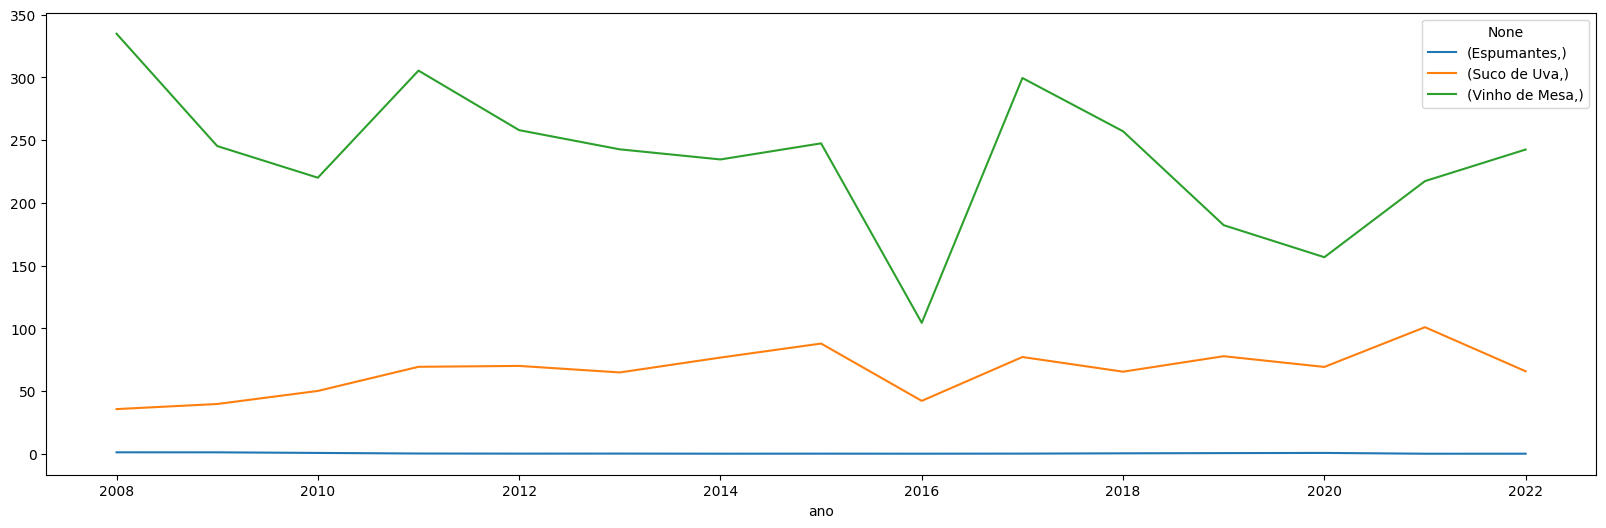

In [11]:
fig, ax = plt.subplots(figsize=(20,6))

for key, grp in df.groupby(['produto']):
    ax = grp.plot(ax=ax, kind='line', x='ano', y='producao',label=key)
ax.set_xticks(anos)
ax.grid(linestyle='-', linewidth=0.3)
# ax.annotate(df['producao'],xy=(df['ano'],df['producao']))
plt.ylabel('Produção em milhões de quilogramas')
plt.xlabel('Anos')
plt.legend(loc='best')
plt.show()

In [19]:
fig = px.line(df, 
              x="ano", 
              y="quantidade", 
              color='produto', 
              title='Produção de uvas e seus derivados nos últimos 15 anos',
              labels={
                  'ano':'Anos',
                  'produto':'Produto',
                  'quantidade':'Produção em milhões de quilogramas'
              },
              markers=True)
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)
fig.show()